In [653]:
# Importing common libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [655]:
data=pd.read_csv("data\\mental-illnesses-prevalence.csv")

In [657]:
data.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [659]:
data.isnull().sum()

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64

In [661]:
data.size

51360

In [663]:
data.shape

(6420, 8)

In [665]:
data.dtypes

Entity                                                                                object
Code                                                                                  object
Year                                                                                   int64
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    float64
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       float64
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          float64
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           float64
dtype: object

In [667]:
data.describe()

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


In [669]:
data = data.rename(columns={'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders', 
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized':'Anxiety disorders',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized':'Bipolar disorders',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized':'Eating disorders'})

In [671]:
data.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


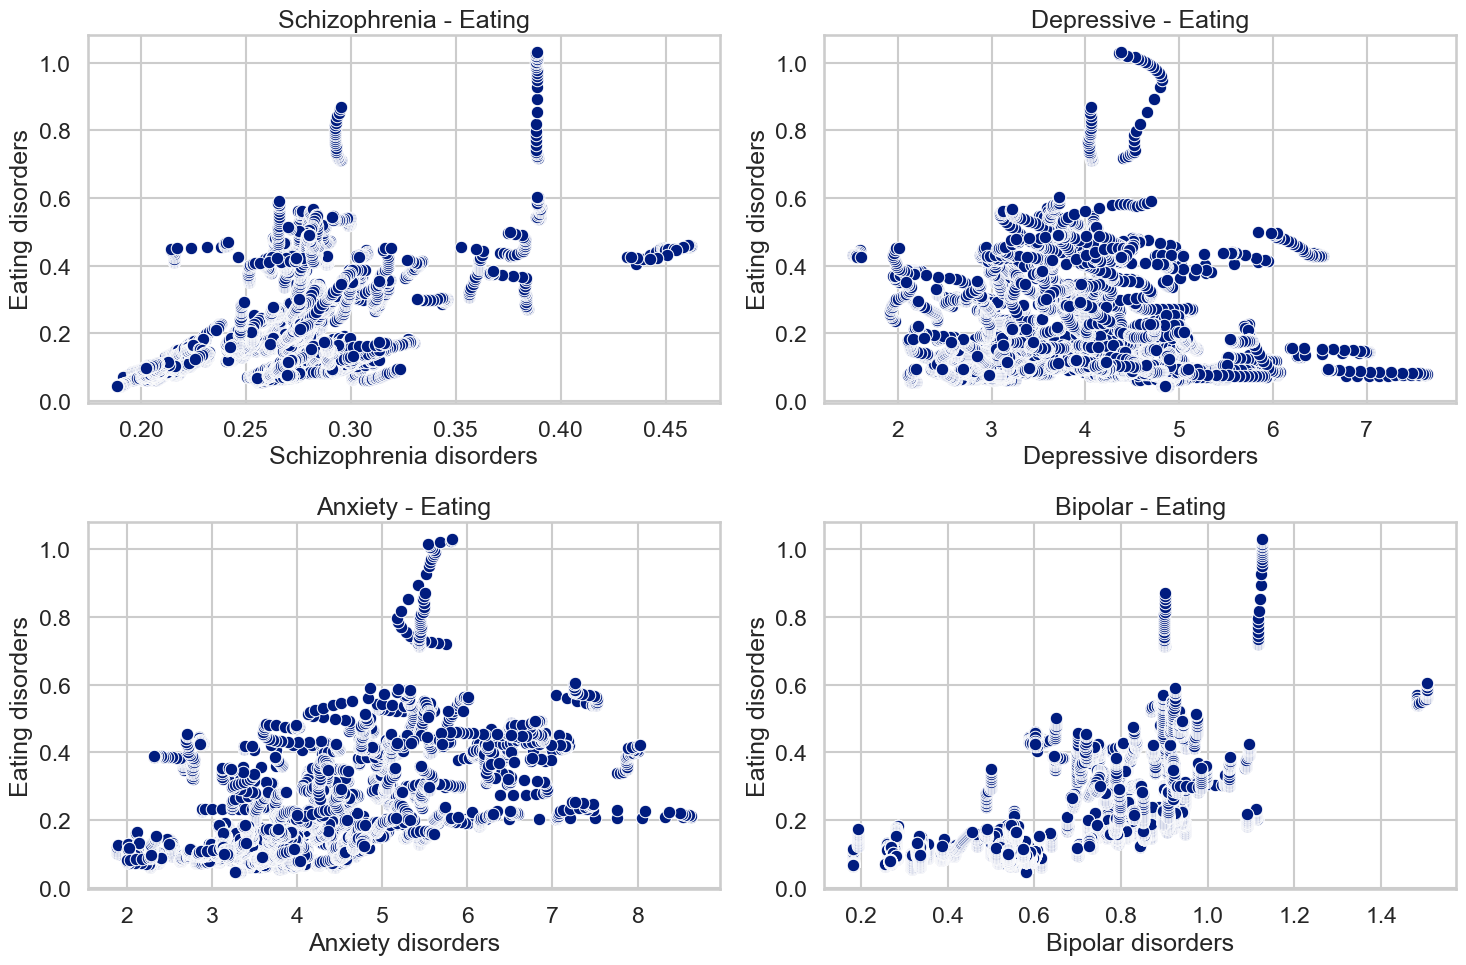

In [673]:
# Create a 2x2 grid of subplots with a specified figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

# First subplot: Scatter plot for Schizophrenia vs Eating disorders
ax1.set_title('Schizophrenia - Eating')  # Set the title for the first subplot
sns.scatterplot(x="Schizophrenia disorders", y="Eating disorders", data=data, ax=ax1)  # Plot the data

# Second subplot: Scatter plot for Depressive vs Eating disorders
ax2.set_title('Depressive - Eating')  # Set the title for the second subplot
sns.scatterplot(x='Depressive disorders', y="Eating disorders", data=data, ax=ax2)  # Plot the data

# Third subplot: Scatter plot for Anxiety vs Eating disorders
ax3.set_title('Anxiety - Eating')  # Set the title for the third subplot
sns.scatterplot(x='Anxiety disorders', y="Eating disorders", data=data, ax=ax3)  # Plot the data

# Fourth subplot: Scatter plot for Bipolar vs Eating disorders
ax4.set_title('Bipolar - Eating')  # Set the title for the fourth subplot
sns.scatterplot(x='Bipolar disorders', y="Eating disorders", data=data, ax=ax4)  # Plot the data

# Adjust the layout to prevent overlapping and improve spacing
plt.tight_layout()

In [674]:
# Import the LabelEncoder class from scikit-learn for encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Iterate through all columns in the dataset
for col in data.columns:
    # Check if the column's data type is 'object' (e.g., categorical or string data)
    if data[col].dtype == 'object':  
        # Apply LabelEncoder to transform categorical data into numerical values
        data[col] = le.fit_transform(data[col])

# Display the first few rows of the updated dataset
data.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0,0,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,0,0,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,0,0,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,0,0,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,0,0,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [675]:
data = data.drop(['Entity', 'Code', 'Year'], axis=1)


In [679]:
Corr = data.corr()

<Axes: >

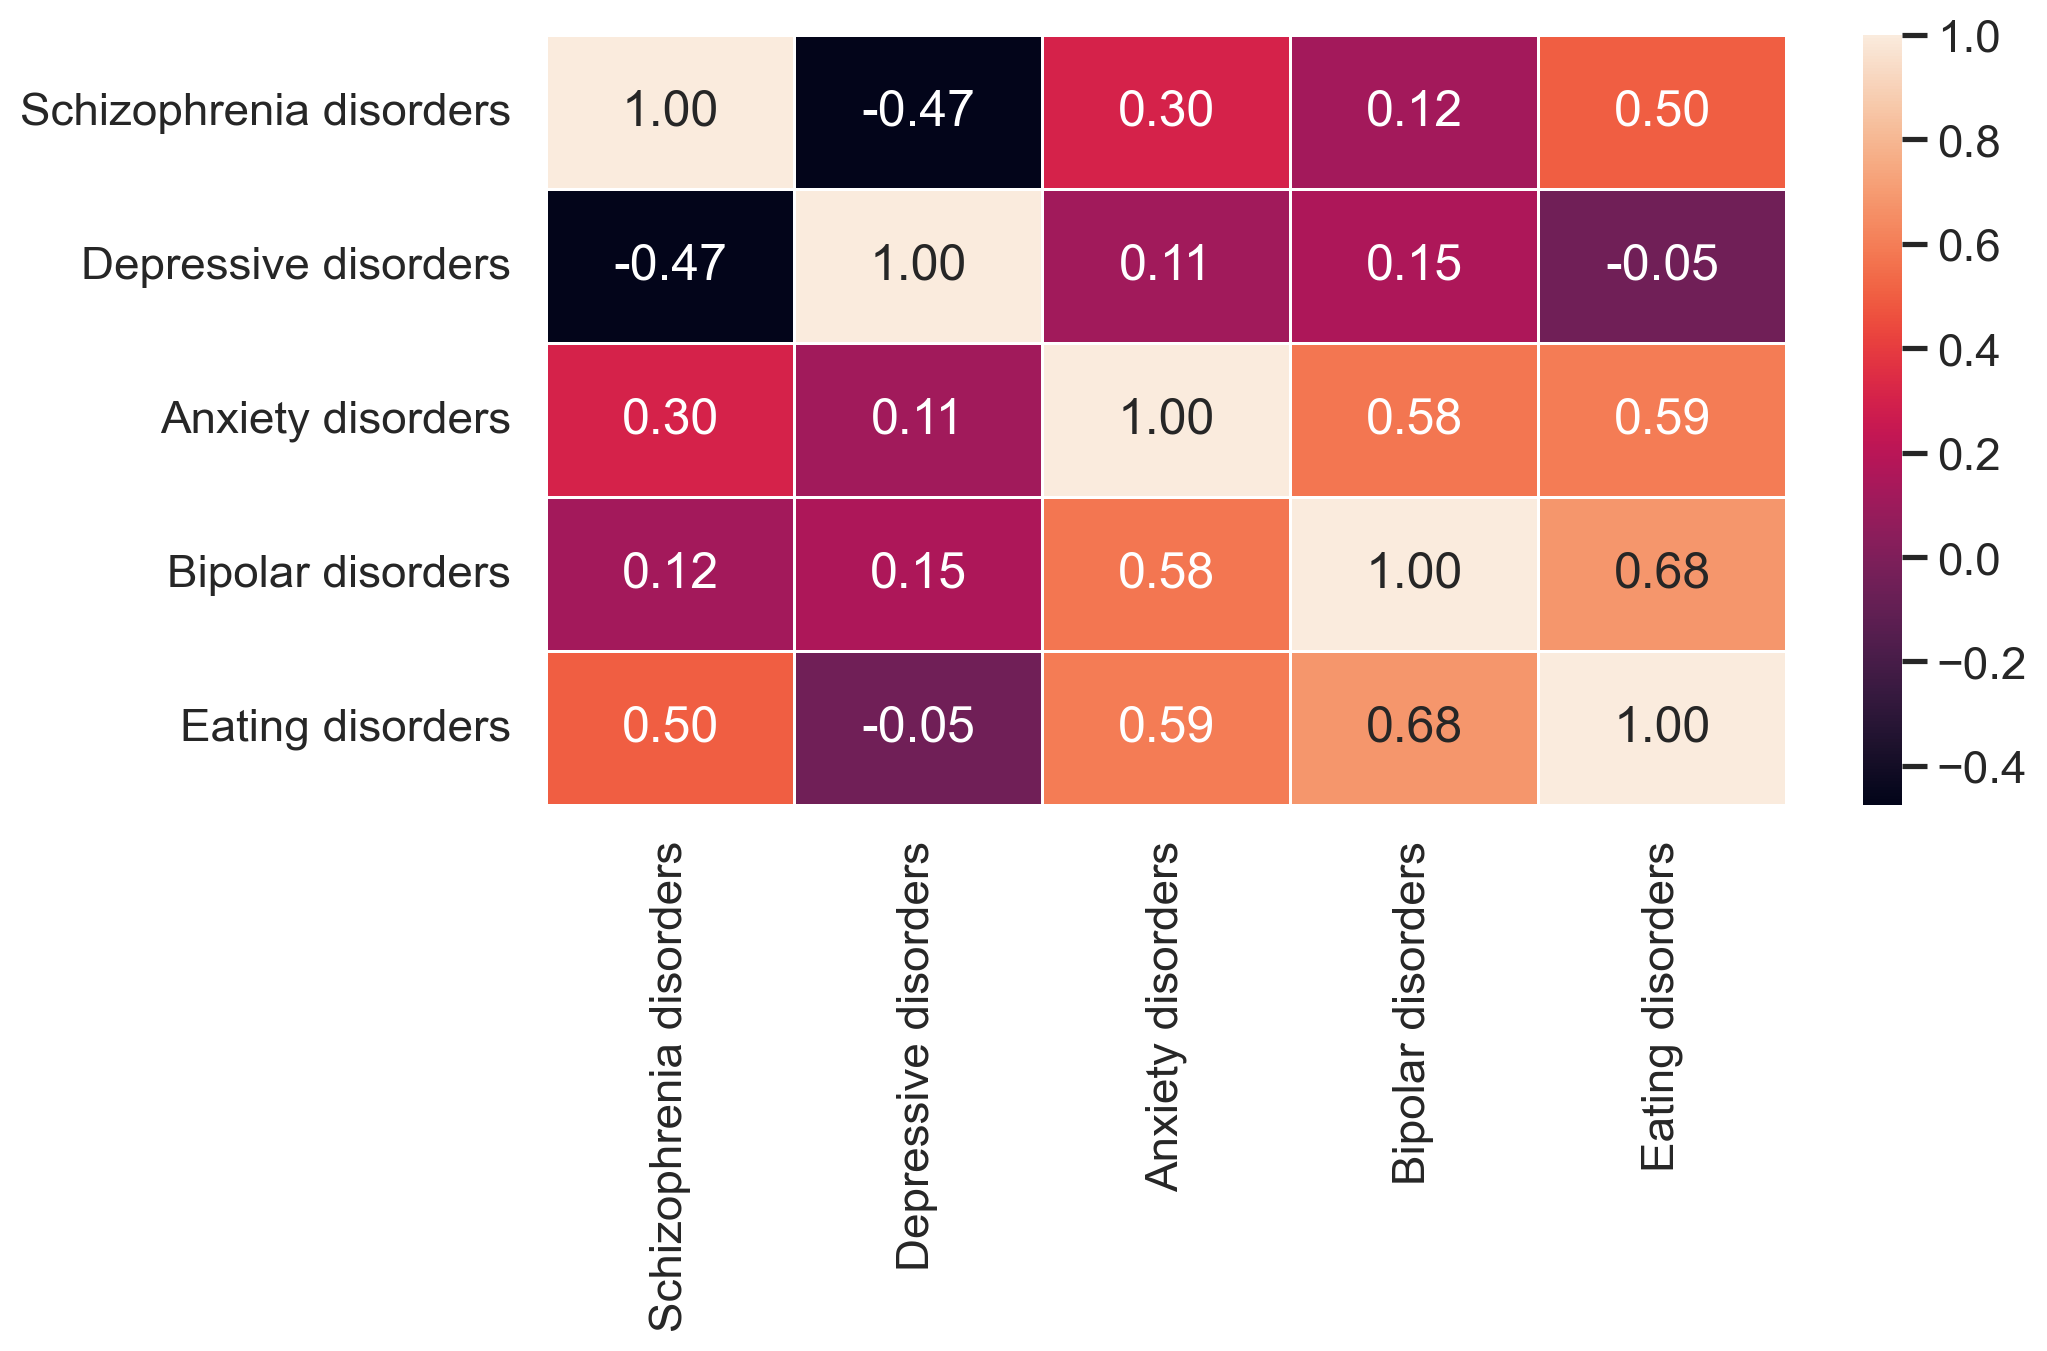

In [681]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(Corr, annot=True,fmt=".2f", linewidth=.5)

## Bipolar disorders vs Eating Disorders

In [684]:
features = ['Bipolar disorders']
X = data[features]
y = data["Eating disorders"]

In [686]:
# Import the preprocessing module from scikit-learn
from sklearn import preprocessing

# Create an instance of MinMaxScaler to scale features to a specified range (default is 0 to 1)
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data and transform the dataset 'X' to normalize its features
X = scaler.fit_transform(X)

In [688]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [690]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [692]:
import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

In [694]:
print("Result on Train Data:")
evaluate(y_train,y_train_pred)

Result on Train Data:
R Squared :  0.45390939377962336
Mean Absolute Error :  0.07513484813822639
Mean Squared Error :  0.010339965327342144
Root Mean Squared Error :  0.10168562006174789


In [696]:
print("Result on Test Data:")
evaluate(y_test,y_test_pred)

Result on Test Data:
R Squared :  0.48021600096020745
Mean Absolute Error :  0.07356442678579227
Mean Squared Error :  0.010384722213333836
Root Mean Squared Error :  0.10190545723038505


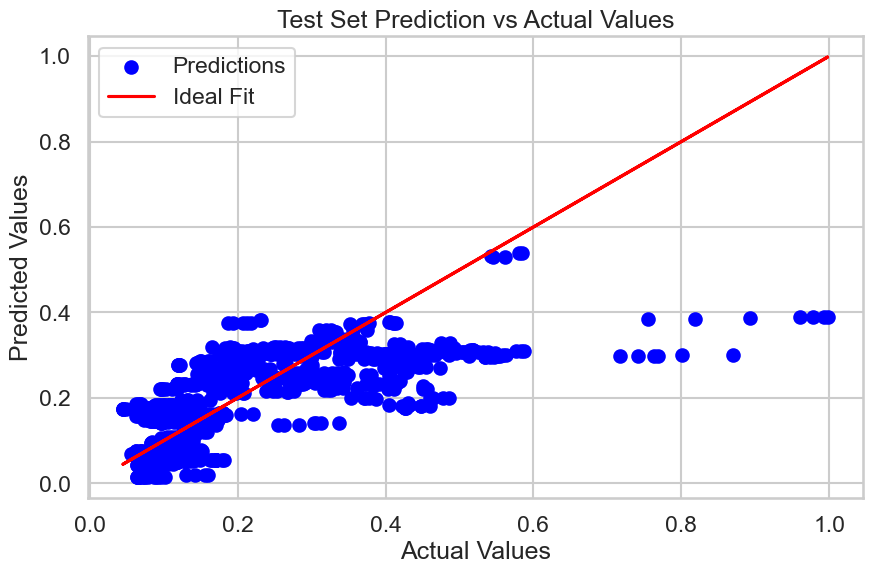

In [698]:
# Visualize the line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Ideal Fit') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Prediction vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

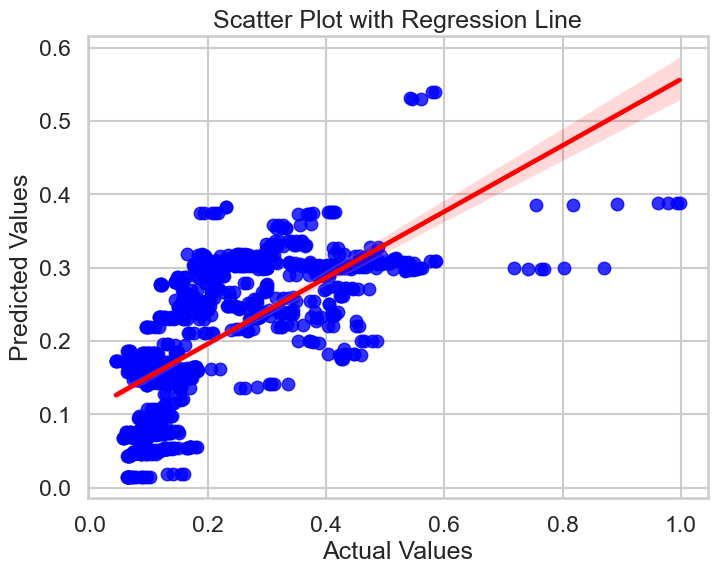

In [700]:
# Set the plot style and context
sns.set_context('talk')
sns.set_style('whitegrid')

# Create a scatter plot with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')
plt.grid(True)

# Show the plot
plt.show()

In [702]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Initialize a KFold cross-validator with 10 splits
k_fold = KFold(10)

# Perform cross-validation on the model
# The model's performance is evaluated on the dataset (X, y)
# The 'cv' parameter specifies the KFold cross-validator
# The 'n_jobs=1' ensures that computations are performed using a single processor
print(cross_val_score(model, X, y.ravel(), cv=k_fold, n_jobs=1))

[0.4511682  0.26407245 0.19740719 0.27288734 0.45882757 0.44424373
 0.63724005 0.4093258  0.46401219 0.52178091]


C:\Users\Amirul Farhan\AppData\Local\Temp\ipykernel_14396\321270415.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(cross_val_score(model, X, y.ravel(), cv=k_fold, n_jobs=1))


In [704]:
print(type(y_test))
print(type(y_test_pred))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [706]:
df = pd.DataFrame({'Actual': y_test.to_numpy(), 
                   'Predicted': y_test_pred.flatten()})

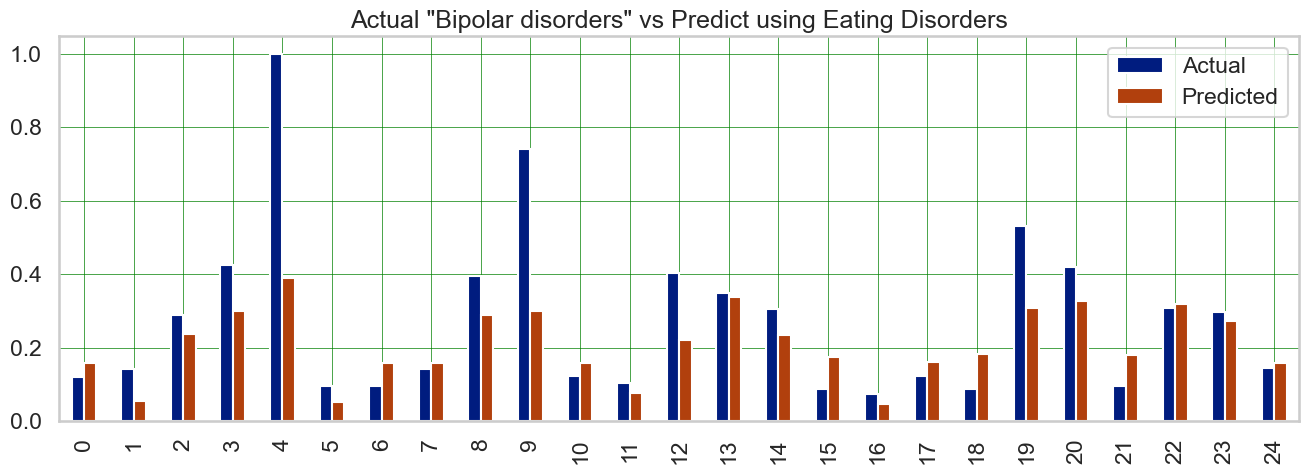

In [710]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual "Bipolar disorders" vs Predict using Eating Disorders')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

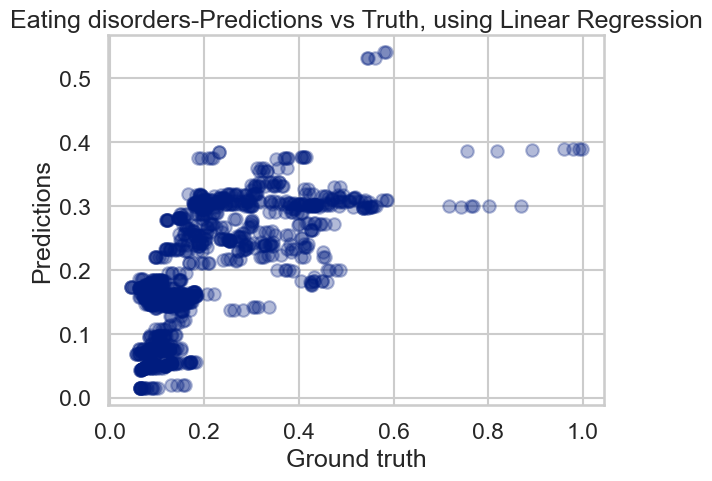

In [712]:
sns.set_context('talk')   # Larger font sizes (suitable for presentations)
sns.set_style('whitegrid')  # Add light gridlines for better readability
sns.set_palette('dark')  # Use colorblind-friendly palette

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.3)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Eating disorders-Predictions vs Truth, using Linear Regression');

## Schizophrenia disorders vs Eating Disorders

Result on Train Data:
R Squared :  0.2528048710029176
Mean Absolute Error :  0.08376399310200235
Mean Squared Error :  0.014147783606940368
Root Mean Squared Error :  0.11894445597395605
Result on Test Data:
R Squared :  0.2418525076523972
Mean Absolute Error :  0.08692272140110638
Mean Squared Error :  0.01514696704652264
Root Mean Squared Error :  0.12307301510291621


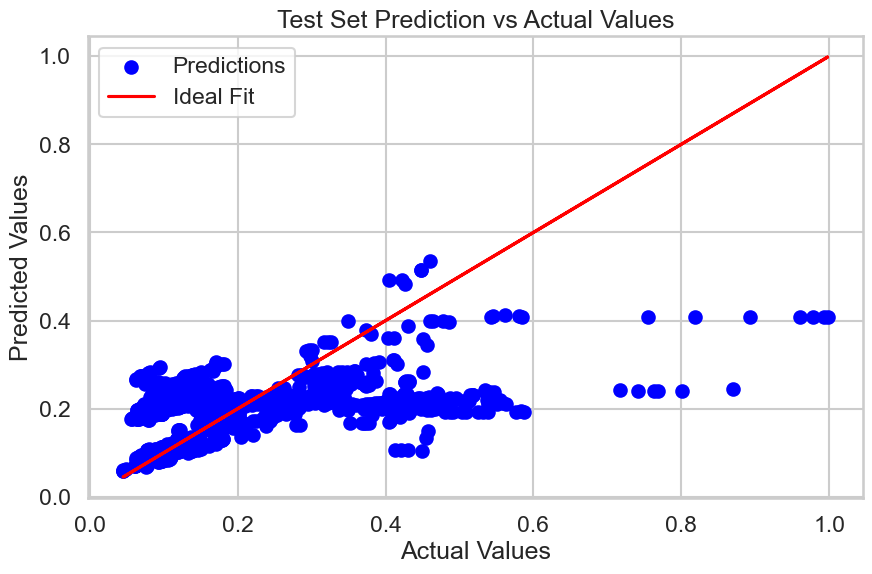

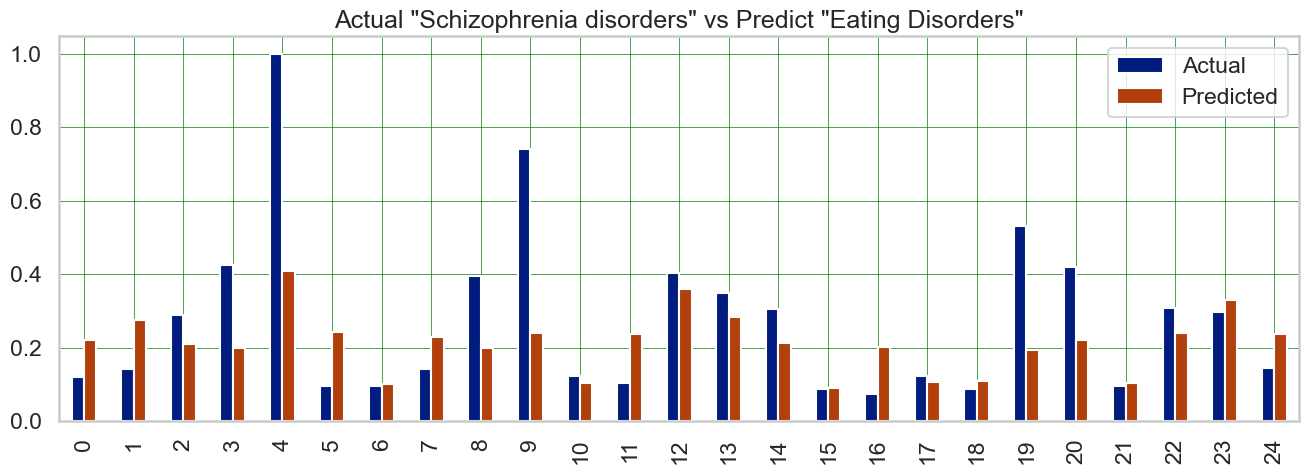

In [715]:
features = ['Schizophrenia disorders']
X = data[features]
y = data["Eating disorders"]

# Import the preprocessing module from scikit-learn
from sklearn import preprocessing

# Create an instance of MinMaxScaler to scale features to a specified range (default is 0 to 1)
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data and transform the dataset 'X' to normalize its features
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

print("Result on Train Data:")
evaluate(y_train,y_train_pred)

print("Result on Test Data:")
evaluate(y_test,y_test_pred)

# Visualize the line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Ideal Fit') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Prediction vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

df = pd.DataFrame({'Actual': y_test.to_numpy(), 
                   'Predicted': y_test_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual "Schizophrenia disorders" vs Predict "Eating Disorders"')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Depressive disorders vs Eating Disorders

Result on Train Data:
R Squared :  0.003275147319169336
Mean Absolute Error :  0.10431871478782795
Mean Squared Error :  0.018872509983189373
Root Mean Squared Error :  0.13737725424243044
Result on Test Data:
R Squared :  -0.0003737054637906745
Mean Absolute Error :  0.10691717485048595
Mean Squared Error :  0.019986384844389173
Root Mean Squared Error :  0.14137321119784035


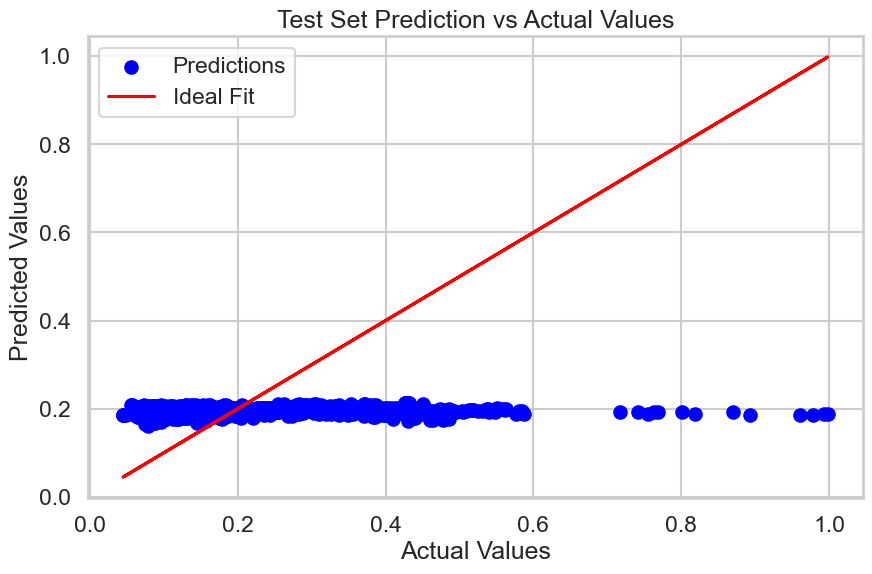

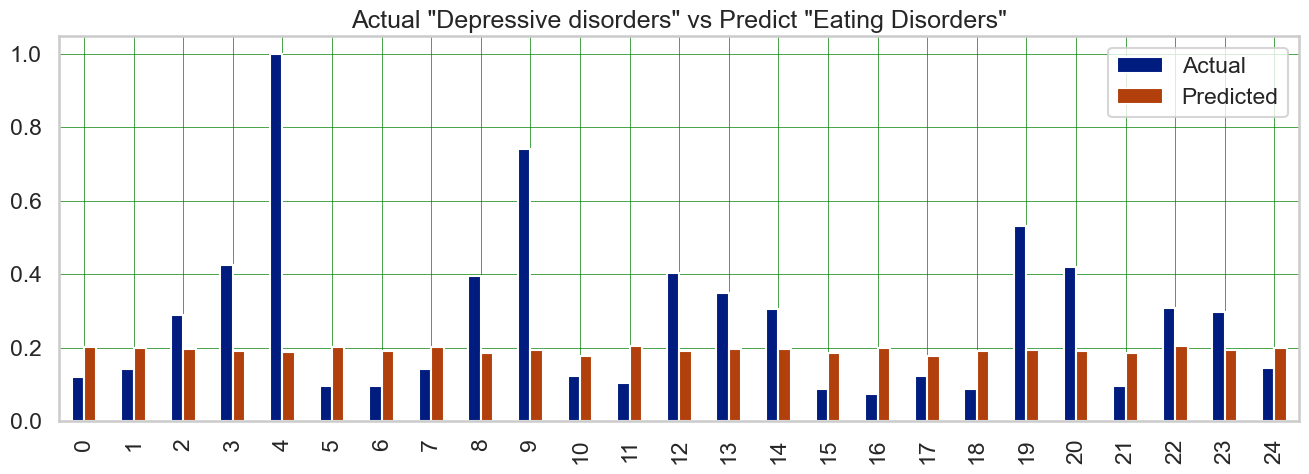

In [718]:
features = ['Depressive disorders']
X = data[features]
y = data["Eating disorders"]

# Import the preprocessing module from scikit-learn
from sklearn import preprocessing

# Create an instance of MinMaxScaler to scale features to a specified range (default is 0 to 1)
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data and transform the dataset 'X' to normalize its features
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

print("Result on Train Data:")
evaluate(y_train,y_train_pred)

print("Result on Test Data:")
evaluate(y_test,y_test_pred)

# Visualize the line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Ideal Fit') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Prediction vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

df = pd.DataFrame({'Actual': y_test.to_numpy(), 
                   'Predicted': y_test_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual "Depressive disorders" vs Predict "Eating Disorders"')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Anxiety disorders vs Eating Disorders

Result on Train Data:
R Squared :  0.3410352335027058
Mean Absolute Error :  0.07857307842112567
Mean Squared Error :  0.012477183749197205
Root Mean Squared Error :  0.11170131489466543
Result on Test Data:
R Squared :  0.3989785251270124
Mean Absolute Error :  0.07529137171209112
Mean Squared Error :  0.012007759131358637
Root Mean Squared Error :  0.10957992120529489


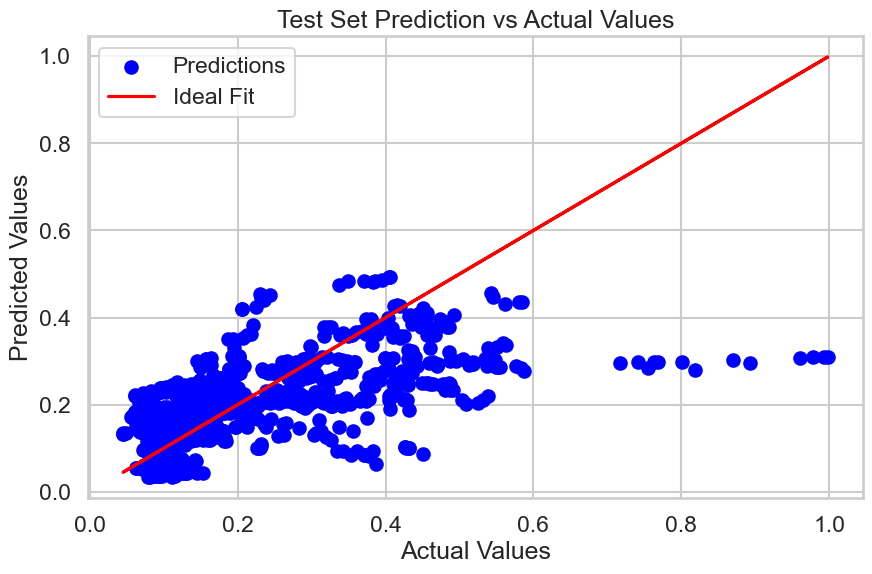

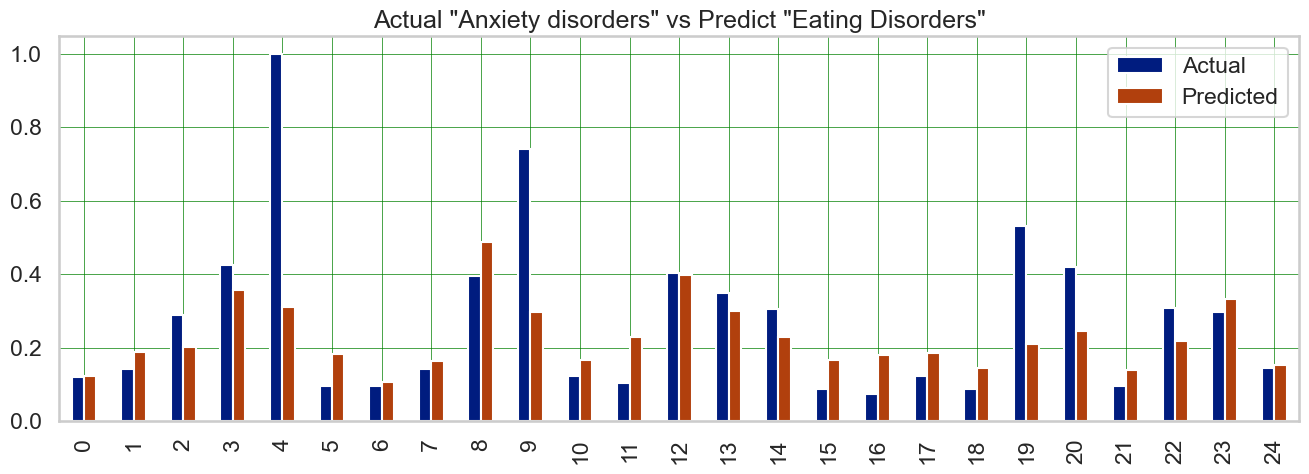

In [721]:
features = ['Anxiety disorders']
X = data[features]
y = data["Eating disorders"]

# Import the preprocessing module from scikit-learn
from sklearn import preprocessing

# Create an instance of MinMaxScaler to scale features to a specified range (default is 0 to 1)
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to the data and transform the dataset 'X' to normalize its features
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

print("Result on Train Data:")
evaluate(y_train,y_train_pred)

print("Result on Test Data:")
evaluate(y_test,y_test_pred)

# Visualize the line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Ideal Fit') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Prediction vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

df = pd.DataFrame({'Actual': y_test.to_numpy(), 
                   'Predicted': y_test_pred.flatten()})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual "Anxiety disorders" vs Predict "Eating Disorders"')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### PREDICT USING ALL FEATURES


In [724]:
# Splitting the dataset into features (X_all) and target variable (y_all)
X_all = data.drop('Eating disorders', axis=1)  

# Assigning the 'Eating disorders' column as the target variable (y_all)
y_all = data['Eating disorders'] 

In [726]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [728]:
lr = LinearRegression()
lr.fit(X_train_all,y_train_all)
y_train_all_pred = lr.predict(X_train_all)
y_test_all_pred=lr.predict(X_test_all)

In [730]:
print("Result on Train Data with ALL:")
evaluate(y_train_all,y_train_all_pred)

Result on Train Data with ALL:
R Squared :  0.6501945031458656
Mean Absolute Error :  0.054080498615081664
Mean Squared Error :  0.00662340034343275
Root Mean Squared Error :  0.08138427577507064


In [732]:
print("Result on Test Data with ALL:")
evaluate(y_test_all,y_test_all_pred)

Result on Test Data with ALL:
R Squared :  0.6776573651975214
Mean Absolute Error :  0.05295538495364768
Mean Squared Error :  0.006440057266329179
Root Mean Squared Error :  0.08024996739145243


In [734]:
df_all = pd.DataFrame({'Actual': y_test_all, 'Predicted': y_test_all_pred.flatten()})

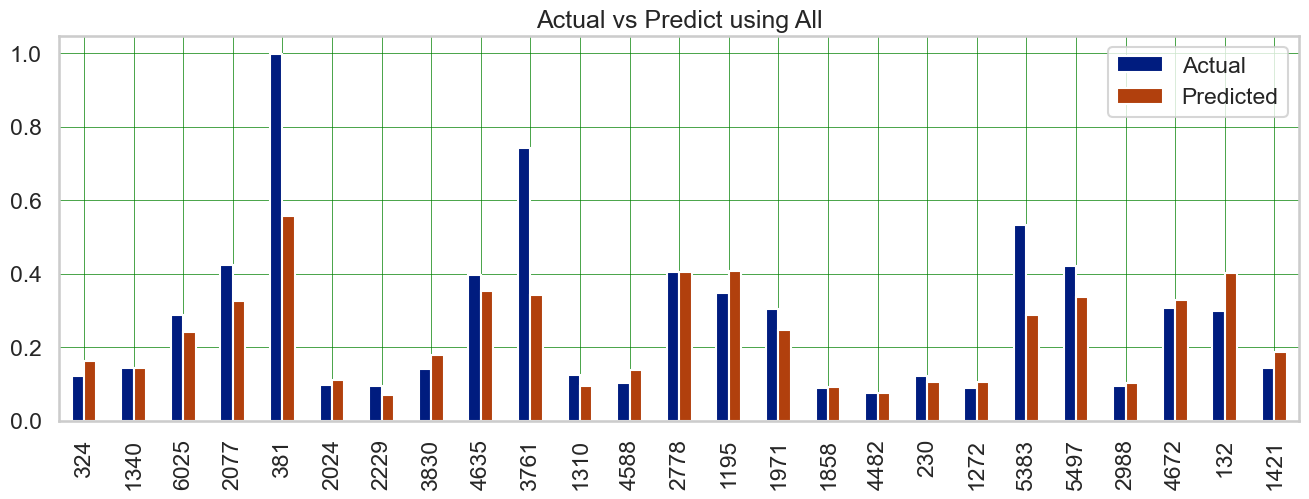

In [736]:
df2 = df_all.head(25)
df2.plot(kind='bar',figsize=(16,5), title='Actual vs Predict using All')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

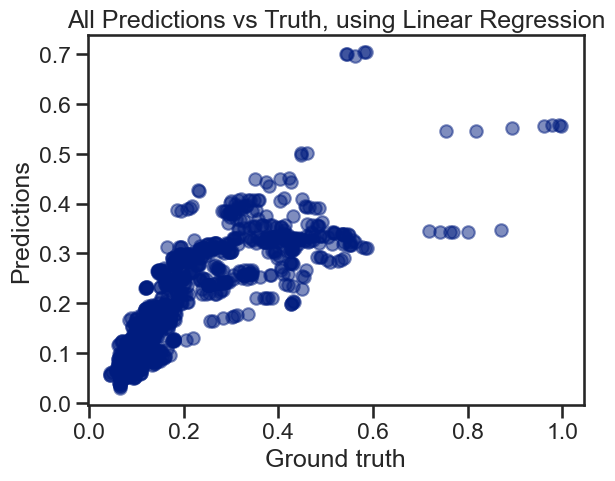

In [738]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test_all, y_test_all_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='All Predictions vs Truth, using Linear Regression');